**Data Source: usa.gov data from bit.ly**

Anynonymous data that was gathered from users who shorten links ending with .gov or .mil

Objective:
To understand users behaviour:

*   top time zone
*   how many windows and non windows user
*   Most used application
*   number of usa.gov and .mil link converted






In [ ]:
import json
path = '/content/drive/MyDrive/pythonExercise/example.txt'
records = [json.loads(line) for line in open(path)]

retrieve record index 0

In [ ]:
records[:4]

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

counting time zone using pandas library

In [ ]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
frame = DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [ ]:
#count timezone
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

there is missing value
replace the missing value with 'Unknown'

In [ ]:
frame['tz'].isnull().values.any()

True

In [ ]:
#replace ''
tz_frame = frame['tz']
tz_frame[tz_frame == ''] = 'Unknown'
tz_frame[:10]

<ipython-input-7-141661417f3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tz_frame[tz_frame == ''] = 'Unknown'


0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7              Unknown
8              Unknown
9              Unknown
Name: tz, dtype: object

In [ ]:
tz_counts = tz_frame.value_counts()
tz_counts[:10]

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

make a horizontol bar plot to display the top 10 time zone

<Axes: title={'center': 'Top 10 Time Zone'}, ylabel='time zone'>

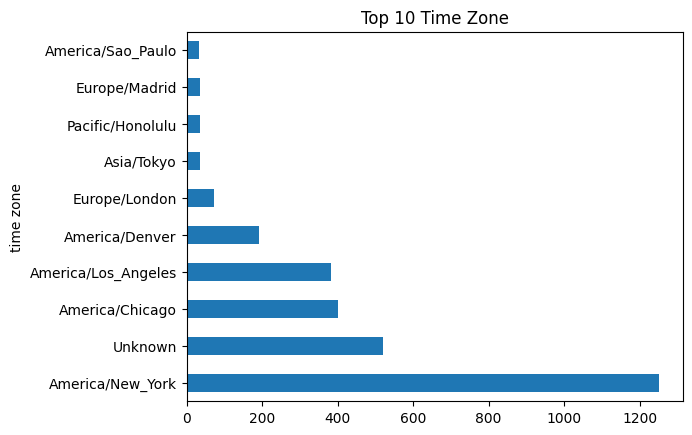

In [ ]:
tz_counts[:10].plot(kind='barh', ylabel='time zone', title='Top 10 Time Zone', rot=0)

From the dataset, the **a** field hold the information related with the browser, device or the application that was used to shorten the URL

In [ ]:
#get the first data from 'a' field and set into dataframe named browserType
browserType = pd.Series([x.split()[0] for x in frame.a.dropna()])
browserType

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [ ]:
#count value for application used
browserType.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
Name: count, dtype: int64

categorize top timezone users to windows user and non-windows user



*   get value that is not null and set to a new dataFrame
*   use numpy where function to find "windows" word in **a** field
*   insert the result as new column in the dataframe





In [ ]:
cframe = frame[frame.a.notnull()]

In [ ]:
#os = operating system
os = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
cframe.insert(len(cframe.columns),"os",os)

In [ ]:
cframe[:5]

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows


Data is grouped by time zone and type of OS

two ways to count group.


> - reshape Pandas dataFrame using stack/unstack
- missing value will be filled with 0

```
unstack = cframe.groupby(['tz','os'])
agg_counts = unstack.size().unstack().fillna(0)
agg_counts[:30]
```

In [ ]:
by_tz_os = cframe.groupby(['tz','os'])
tz_os= by_tz_os.size().to_frame('count').reset_index()
tz_os[:10]

,tz,os,count
0,Africa/Cairo,Windows,3
1,Africa/Casablanca,Windows,1
2,Africa/Ceuta,Windows,2
3,Africa/Johannesburg,Windows,1
4,Africa/Lusaka,Windows,1
5,America/Anchorage,Not Windows,4
6,America/Anchorage,Windows,1
7,America/Argentina/Buenos_Aires,Not Windows,1
8,America/Argentina/Cordoba,Windows,1
9,America/Argentina/Mendoza,Windows,1


Select top overall time zones:
reference: https://www.youtube.com/watch?v=6W8UHvn8ckg

In [ ]:
#sort top to bottom and insert to new array
top_timezones = tz_os.sort_values(['count'], ascending=False)
top_timezones[:10]

,tz,os,count
40,America/New_York,Windows,912
39,America/New_York,Not Windows,339
14,America/Chicago,Windows,285
148,Unknown,Windows,276
30,America/Los_Angeles,Windows,252
147,Unknown,Not Windows,245
18,America/Denver,Not Windows,132
29,America/Los_Angeles,Not Windows,130
13,America/Chicago,Not Windows,115
19,America/Denver,Windows,59


In [ ]:
#drop unknown
top_timezones = top_timezones.drop([148])
top_timezones = top_timezones.drop([147])
top_timezones[:10]

,tz,os,count
40,America/New_York,Windows,912
39,America/New_York,Not Windows,339
14,America/Chicago,Windows,285
30,America/Los_Angeles,Windows,252
18,America/Denver,Not Windows,132
29,America/Los_Angeles,Not Windows,130
13,America/Chicago,Not Windows,115
19,America/Denver,Windows,59
115,Europe/London,Not Windows,43
146,Pacific/Honolulu,Windows,36


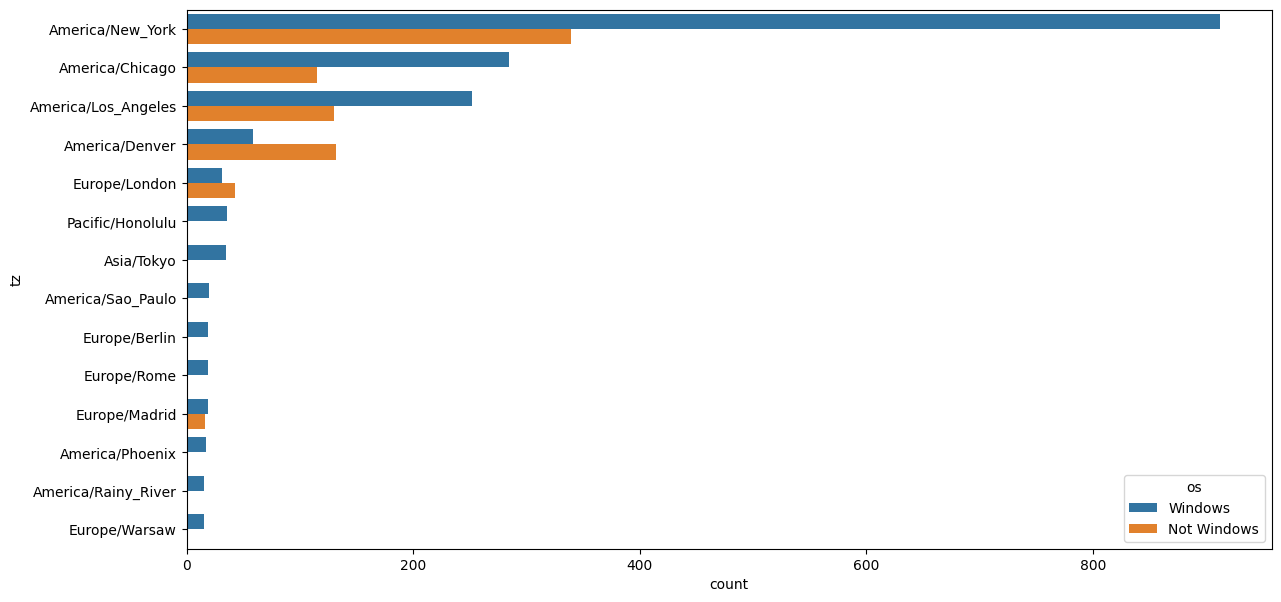

In [ ]:
#plot a bar chart
plt.figure(figsize=(14, 7))

g = sns.barplot(x="count", y="tz", hue="os", data=top_timezones[:20])

Key Takeaways:
* Most of the user are from the America/NewYork timezone
* and all of the Bitly users are using Windows operating system
* Some timezone (Pacific/Honolulu, Asia/Tokyo, Europe/Berlin) only have Windows user





#Most Used Application
### Json data to DataFrame

In [ ]:
#creating a data frame
usa_bitly = pd.DataFrame(columns=['application','country','timezone'])

In [ ]:
for i in range(0, len(records)):
    currentItem = records[i]
    usa_bitly.loc[i] = [currentItem.get("a"),currentItem.get("c"),currentItem.get("tz")]

In [ ]:
usa_bitly.head()

,application,country,timezone
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,America/New_York
1,GoogleMaps/RochesterNY,US,America/Denver
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,America/New_York
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,America/Sao_Paulo
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,America/New_York


get the application name only by splitting the text and modify the dataframe

In [ ]:
usa_bitly['application'] = usa_bitly['application'].str.split(' ').str[0]
usa_bitly.head()

,application,country,timezone
0,Mozilla/5.0,US,America/New_York
1,GoogleMaps/RochesterNY,US,America/Denver
2,Mozilla/4.0,US,America/New_York
3,Mozilla/5.0,BR,America/Sao_Paulo
4,Mozilla/5.0,US,America/New_York


count the number of user for each application

In [ ]:
app_count = usa_bitly.groupby('application')['application'].count()

In [ ]:
app_count = app_count.to_frame('count')

In [ ]:
app_count.sort_values(by = 'count', ascending = False)[:3]

,count
application,
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121


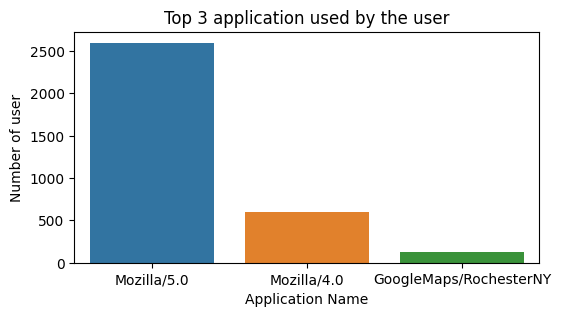

In [ ]:
#top 3 most used browser application
#plot a bar chart
plt.figure(figsize=(6, 3))

chart1 = sns.barplot(x="application", y="count", hue="application", data=app_count.sort_values(by = 'count', ascending = False)[:3])

chart1.set(xlabel = 'Application Name', ylabel='Number of user')

plt.title('Top 3 application used by the user')

plt.show()

## number of usa.gov link converted

In [ ]:
#since the details of the dataset couldnt be retrieve, 'u' field
#in the data is considered as the link of the url that is used to convert using bitly

#create a new dataframe to store the data
url = pd.DataFrame(columns=['timezone','url'])

In [ ]:
for i in range(0, len(records)):
    currentItem = records[i]
    url.loc[i] = [currentItem.get("tz"),currentItem.get("u")]

url.head()

,timezone,url
0,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [ ]:
#
urlFrame = np.where(url['url'].str.contains('.gov'),'.gov', 'others')
urlFrame[:10]

array(['.gov', '.gov', '.gov', '.gov', '.gov', '.gov', '.gov', '.gov',
       '.gov', '.gov'], dtype='<U6')

In [ ]:
#groupby country
by_c_url = url.groupby(['timezone',urlFrame])

In [ ]:
agg_counts_url = by_c_url.size().unstack().fillna(0)
agg_counts_url[:10]

,.gov,others
timezone,,
,505.0,16.0
Africa/Cairo,3.0,0.0
Africa/Casablanca,1.0,0.0
Africa/Ceuta,2.0,0.0
Africa/Johannesburg,1.0,0.0
Africa/Lusaka,1.0,0.0
America/Anchorage,5.0,0.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,1.0,0.0
